In [1]:
import tensorflow as tf
import numpy as np

In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
    print("{} degrees Celsius = {} degrees Fahrenhet".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenhet
-10.0 degrees Celsius = 14.0 degrees Fahrenhet
0.0 degrees Celsius = 32.0 degrees Fahrenhet
8.0 degrees Celsius = 46.0 degrees Fahrenhet
15.0 degrees Celsius = 59.0 degrees Fahrenhet
22.0 degrees Celsius = 72.0 degrees Fahrenhet
38.0 degrees Celsius = 100.0 degrees Fahrenhet


In [3]:
c=celsius_q
f=fahrenheit_a
# for _ in range(100):
#     c = np.append(c, celsius_q)
#     f = np.append(f, fahrenheit_a)
# c.shape    

# c = np.random.randint(-1000, 1000, 700) / 10
# f = c * 1.8 + 32

In [4]:
class WeightUpdateLogger(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        # Store initial weights
        self.prev_weights = [w.numpy() for w in self.model.trainable_weights]

    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch+1}:")
        for i, w in enumerate(self.model.trainable_weights):
            new_w = w.numpy()
            old_w = self.prev_weights[i]
            update = new_w - old_w
            mean_change = tf.reduce_mean(tf.abs(update)).numpy()
            print(f"  Layer '{w.name}': mean weight change = {mean_change:.6e}")
            self.prev_weights[i] = new_w  # Update for next epoch


In [10]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input([1]),
        tf.keras.layers.Dense(units=1)  
    ]
)

In [11]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1), metrics=['accuracy'])

In [12]:
history = model.fit(c, f, epochs=500, verbose=False,
              callbacks=[WeightUpdateLogger()])
print("Finished training the model")


Epoch 1:
  Layer 'kernel': mean weight change = 9.999931e-02
  Layer 'bias': mean weight change = 9.999933e-02

Epoch 2:
  Layer 'kernel': mean weight change = 9.988654e-02
  Layer 'bias': mean weight change = 9.996267e-02

Epoch 3:
  Layer 'kernel': mean weight change = 9.969375e-02
  Layer 'bias': mean weight change = 9.990223e-02

Epoch 4:
  Layer 'kernel': mean weight change = 9.941438e-02
  Layer 'bias': mean weight change = 9.981552e-02

Epoch 5:
  Layer 'kernel': mean weight change = 9.904581e-02
  Layer 'bias': mean weight change = 9.970418e-02

Epoch 6:
  Layer 'kernel': mean weight change = 9.858328e-02
  Layer 'bias': mean weight change = 9.956777e-02

Epoch 7:
  Layer 'kernel': mean weight change = 9.802146e-02
  Layer 'bias': mean weight change = 9.940529e-02

Epoch 8:
  Layer 'kernel': mean weight change = 9.735703e-02
  Layer 'bias': mean weight change = 9.921765e-02

Epoch 9:
  Layer 'kernel': mean weight change = 9.658547e-02
  Layer 'bias': mean weight change = 9.900

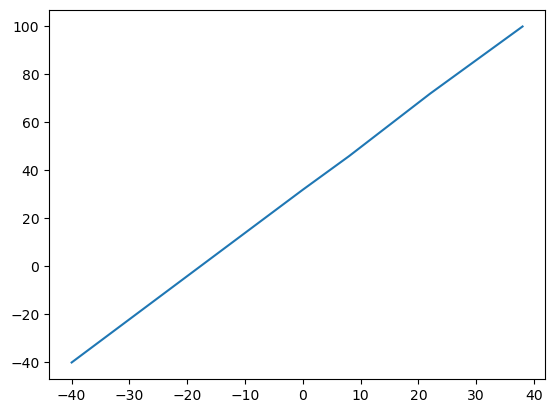

In [13]:
import matplotlib.pyplot as plt
plt.plot(celsius_q, fahrenheit_a)

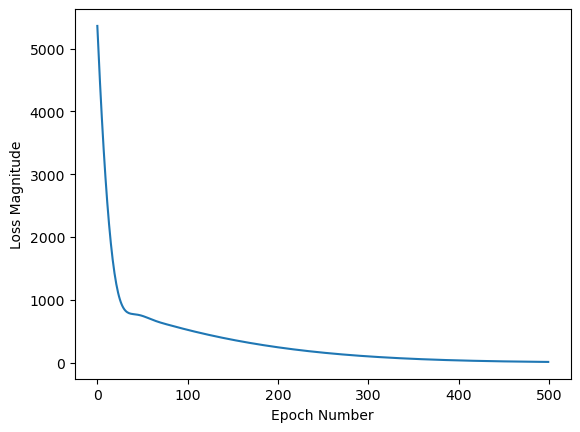

In [14]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])